# Kampus Merdeka 6: IBM & Skilvul
# Artificial Intelligence Phase Challenge

## Kelompok: 12
## Anggota

*   Mohamad Agil Qorizqi Ghaniyo
*   Mohammad Zakaria Akbar Falah
*   Jacinda Olga Nabila
*   Fathur Rahman
*   Eqania Oktayessofa


# Problem Definition
##Topik: Human Detection Dataset

## Latar Belakang
Dalam konteks penggunaan CCTV, mendeteksi manusia dalam rekaman menjadi sangat penting untuk keamanan dan pengawasan. Namun, tantangan teknis seperti  sudut pandang kamera perlu diatasi. Salah satu solusinya adalah pengembangan model deep learning yang canggih dan responsif. Model ini bertujuan untuk meningkatkan kemampuan CCTV dalam mendeteksi manusia dengan lebih efektif, memberikan kontribusi signifikan dalam bidang keamanan dan pengawasan.

## Tujuan Penelitian
Tujuan penelitian ini adalah untuk mengembangkan model deep learning yang canggih dan responsif dalam mendeteksi kehadiran manusia dalam rekaman CCTV. Model ini dirancang untuk mengatasi tantangan teknis yang sering dihadapi dalam penggunaan CCTV, seperti variasi sudut pandang kamera, sehingga meningkatkan kemampuan sistem dalam mengawasi dan memantau lingkungan dengan akurasi yang tinggi. Dengan demikian, penelitian ini bertujuan untuk memberikan kontribusi dalam meningkatkan efektivitas penggunaan CCTV dalam bidang keamanan dan pengawasan, serta membantu dalam melindungi masyarakat dari berbagai risiko keamanan yang mungkin terjadi.
## Pertanyaan kunci
*   1.Bagaimana mengidentifikasi tantangan teknis seperti variasi sudut pandang kamera?
*   2.Bagaimana mengembangkan model deep learning yang canggih dan responsif untuk meningkatkan kemampuan CCTV dalam mendeteksi kehadiran manusia dalam rekaman?

## Data yang akan dipakai
Human Detection
<br>Sumber Data: https://www.kaggle.com/datasets/constantinwerner/human-detection-dataset/data
<br>Dataset ini berjumlah 921 dan memiliki 2 class
<br>**Kelas 0 (no human)** : 362
<br>**Kelas 1 (human)** : 559

## Jenis Masalah Neural Network
Computer Vision
## Model
Model yang digunakan CNN

# Preparation | Persiapan
## Import Libraries

In [ ]:
from keras.utils import to_categorical
from tensorflow.keras.utils import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from PIL import Image, UnidentifiedImageError
from sklearn.model_selection import train_test_split
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import zipfile
import shutil
import random
import cv2
import glob
import io
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

## Get Data | Mendapatkan Data

In [ ]:
import zipfile
local_zip = 'images.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/human detection/')
zip_ref.close()

# Menghapus berkas zip yang sudah tidak diperlukan
#rm archive29.zip
# Menghapus berkas zip yang sudah tidak diperlukan
!rm images.zip

In [ ]:
base_dir= 'human detection/human detection dataset'


## Explore Data (EDA) | Eksplorasi Data

In [ ]:
def create_dataframe(directory):
    image_paths = []
    labels = []
    for label in os.listdir(directory):
        for imagename in os.listdir(os.path.join(directory, label)):
            image_paths.append(os.path.join(directory, label, imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths, labels
    print(image_paths, labels)


In [ ]:
# Menghitung jumlah gambar pada dataset
number_label = {}
total_files = 0
for i in os.listdir(base_dir):
    counting = len(os.listdir(os.path.join(base_dir, i)))
    number_label[i] = counting
    total_files += counting
print("Total Files : " + str(total_files))

Total Files : 921


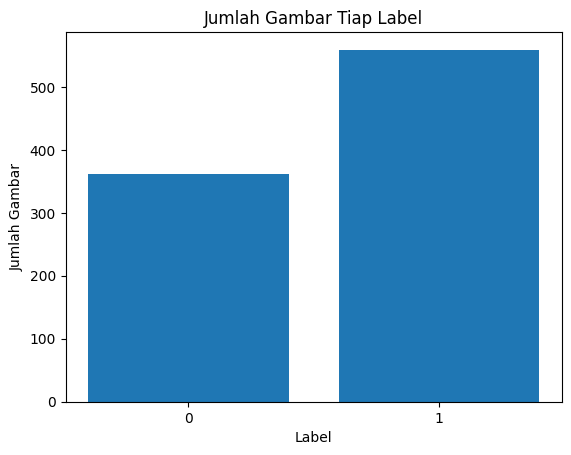

In [ ]:
# Visualisasi jumlah gambar tiap kelas
plt.bar(number_label.keys(),number_label.values());
plt.title("Jumlah Gambar Tiap Label");
plt.xlabel('Label');
plt.ylabel('Jumlah Gambar');

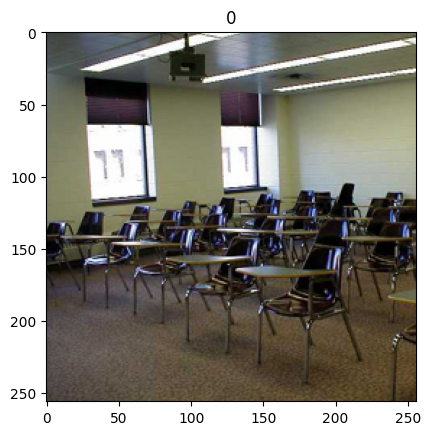

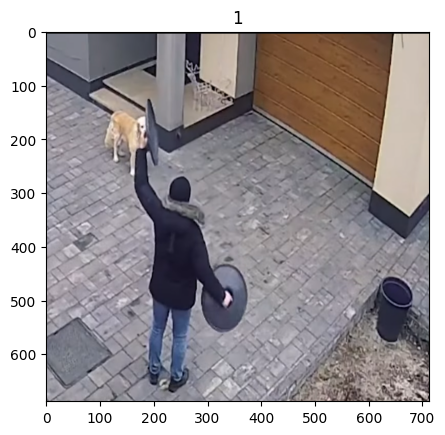

In [ ]:
# Menampilkan sampel gambar tiap kelas
img_each_class = 3
img_samples = {}
classes = list(number_label.keys())

for c in classes:
    temp = os.listdir(os.path.join(base_dir, c))[:img_each_class]
    for item in temp:
        img_path = os.path.join(base_dir, c, item)
        img_samples[c] = img_path

for i in img_samples:
    fig = plt.gcf()
    img = mpimg.imread(img_samples[i])
    plt.title(i)
    plt.imshow(img)
    plt.show()

In [ ]:
# digunakan untuk menampilkan nama-nama label dalam data train
data= pd.DataFrame()
data['images'],data['label'] = create_dataframe(base_dir)

0 completed
1 completed


In [ ]:
#untuk print data dalam folder train
print(data)

                                                images label
0     human detection/human detection dataset/0/96.png     0
1     human detection/human detection dataset/0/39.png     0
2    human detection/human detection dataset/0/176.png     0
3    human detection/human detection dataset/0/238.png     0
4    human detection/human detection dataset/0/251.png     0
..                                                 ...   ...
916  human detection/human detection dataset/1/544.png     1
917    human detection/human detection dataset/1/5.png     1
918  human detection/human detection dataset/1/181.png     1
919  human detection/human detection dataset/1/369.png     1
920  human detection/human detection dataset/1/201.png     1

[921 rows x 2 columns]


## Preprocess Data | Proses Awal Data

In [ ]:
base_dir='/content/human detection/human detection dataset'
# Define the target dimensions
target_width = 175
target_height = 175
max_file_size_kb = 8  # Maximum file size in KB
scale_factor = 0.3  # Additional scale factor

# Iterate through all files in the folder and subfolders
for filename in glob.iglob(os.path.join(base_dir, '**', '*.png'), recursive=True):
    try:
        # Open the image
        image = Image.open(filename)

        # Get the original image dimensions
        width, height = image.size

        # Calculate the new image dimensions with additional scale factor
        new_width = int(width * scale_factor)
        new_height = int(height * scale_factor)

        # Resize the image to the target dimensions
        image = image.resize((target_width + new_width, target_height + new_height), Image.ANTIALIAS)

        # Convert resized image to OpenCV format (numpy array)
        image_cv2 = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

        # Apply Gaussian Blur to reduce noise
        image_blurred = cv2.GaussianBlur(image_cv2, (5, 5), 0)

        # Convert back to PIL image format
        image_pil = Image.fromarray(cv2.cvtColor(image_blurred, cv2.COLOR_BGR2RGB))

        # Compress the image to meet the maximum file size constraint
        quality = 95  # Initial quality
        output_file_size_kb = float("inf")  # Initial file size
        output = io.BytesIO()
        while output_file_size_kb > max_file_size_kb and quality > 0:
        #Save the resized image with the same filename and adjusted quality
            output.seek(0)
            output.truncate(0)
            image.save(output, format='JPEG', quality=quality)
            output_file_size_kb = len(output.getvalue()) / 1024  # Calculate file size in KB
            quality -= 5  # Reduce quality in steps of 5

        # Save the resized and compressed image with the same filename
        with open(filename, 'wb') as f:
            f.write(output.getvalue())

        print(f"Resized {filename} to {target_width}x{target_height} with quality {quality}")
    except (IOError, OSError, UnidentifiedImageError) as e:
        print(f"Error processing {filename}: {e}")
        continue

<ipython-input-17-4367505e9417>:22: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = image.resize((target_width + new_width, target_height + new_height), Image.ANTIALIAS)


Resized /content/human detection/human detection dataset/0/96.png to 175x175 with quality 80
Resized /content/human detection/human detection dataset/0/39.png to 175x175 with quality 55
Resized /content/human detection/human detection dataset/0/176.png to 175x175 with quality 35
Resized /content/human detection/human detection dataset/0/238.png to 175x175 with quality 35
Resized /content/human detection/human detection dataset/0/251.png to 175x175 with quality 5
Error processing /content/human detection/human detection dataset/0/155.png: cannot write mode RGBA as JPEG
Resized /content/human detection/human detection dataset/0/218.png to 175x175 with quality 35
Resized /content/human detection/human detection dataset/0/78.png to 175x175 with quality 25
Resized /content/human detection/human detection dataset/0/262.png to 175x175 with quality 50
Resized /content/human detection/human detection dataset/0/9.png to 175x175 with quality 45
Resized /content/human detection/human detection dat

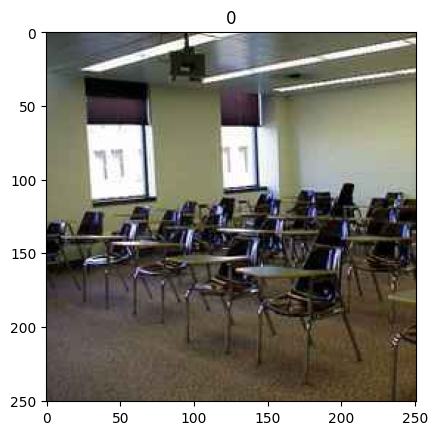

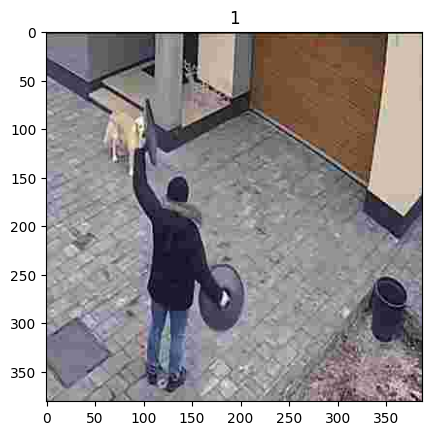

In [ ]:
img_each_class = 3
img_samples = {}
classes = list(number_label.keys())
for c in classes:
    temp = os.listdir(os.path.join(base_dir, c))[:img_each_class]
    for item in temp:
        img_path = os.path.join(base_dir, c, item)
        img_samples[c] = img_path
for i in img_samples:
    fig = plt.gcf()
    img = Image.open(img_samples[i])
    img.save(f"{i}.png", "PNG")  # Menyimpan gambar dalam format PNG
    plt.title(i)
    plt.imshow(img)
    plt.show()


In [ ]:
# Definisi ukuran gambar dan batch size
img_width, img_height = 250, 250
batch_size = 32
num_classes = 2

In [ ]:
datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Model Training | Pelatihan Model

Sesuai tujuan penelitian dan karakteristik data, n algoritma _neural network_ dipilih untuk dilatih dalam eksperimen:

**Algoritma Convolutional Neural Network (CNN) Murni tanpa architecture**



In [ ]:
# Membuat generator untuk data pelatihan
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
)

Found 738 images belonging to 2 classes.


In [ ]:
# Membuat generator untuk data pengujian
test_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)


Found 183 images belonging to 2 classes.


In [ ]:
# Membuat model
cnn_model = Sequential()

# Tambahkan lapisan konvolusi pertama
cnn_model.add(Conv2D(32, 3, padding='same', activation='relu', input_shape=(img_width, img_height, 3)))
cnn_model.add(MaxPooling2D())

# Tambahkan lapisan konvolusi kedua
cnn_model.add(Conv2D(64, 3, padding='same', activation='relu'))
cnn_model.add(MaxPooling2D())

# Tambahkan lapisan konvolusi ketiga
cnn_model.add(Conv2D(64, 3, padding='same', activation='relu'))
cnn_model.add(MaxPooling2D())

# Tambahkan lapisan dropout
cnn_model.add(Dropout(0.5))

# Tambahkan lapisan Flatten
cnn_model.add(Flatten())

# Tambahkan lapisan Dense
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(64, activation='relu'))

# Tambahkan lapisan output dengan softmax untuk klasifikasi biner
cnn_model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Kompilasi model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Melatih model
epochs = 20
history = cnn_model.fit(train_generator,epochs=epochs,validation_data=test_generator)


Epoch 1/20
24/24 [==============================] - 119s 5s/step - loss: 0.7210 - accuracy: 0.5799 - val_loss: 0.6580 - val_accuracy: 0.6066
Epoch 2/20
24/24 [==============================] - 123s 5s/step - loss: 0.6699 - accuracy: 0.6098 - val_loss: 0.6524 - val_accuracy: 0.6557
Epoch 3/20
24/24 [==============================] - 123s 5s/step - loss: 0.6671 - accuracy: 0.6233 - val_loss: 0.6474 - val_accuracy: 0.6339
Epoch 4/20
24/24 [==============================] - 115s 5s/step - loss: 0.6521 - accuracy: 0.6382 - val_loss: 0.6245 - val_accuracy: 0.6667
Epoch 5/20
24/24 [==============================] - 118s 5s/step - loss: 0.6514 - accuracy: 0.6599 - val_loss: 0.6619 - val_accuracy: 0.6503
Epoch 6/20
24/24 [==============================] - 114s 5s/step - loss: 0.6543 - accuracy: 0.6369 - val_loss: 0.6197 - val_accuracy: 0.6503
Epoch 7/20
24/24 [==============================] - 114s 5s/step - loss: 0.6334 - accuracy: 0.6667 - val_loss: 0.6425 - val_accuracy: 0.6448
Epoch 8/20
24

**Algoritma CNN Architecture vgg16**

In [ ]:
# Load pre-trained VGG16 model without top (fully connected layers)
img_widt=250
img_height=250
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze convolutional layers
for layer in vgg16_base.layers:
    layer.trainable = False

# Create a new model
model2 = Sequential()

# Add the VGG16 convolutional base model
model2.add(vgg16_base)


# Add new fully connected layers on top of VGG16
model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(Dense(256, activation='relu'))
# Tambahkan lapisan dropout
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='sigmoid'))

# Compile the model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model2.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_3 (Dense)             (None, 256)               6422784   
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                       

In [ ]:
# Melatih model
epochs = 20
history2 = model2.fit(train_generator, epochs=epochs, validation_data=test_generator)

Epoch 1/20
24/24 [==============================] - 747s 30s/step - loss: 0.5360 - accuracy: 0.7575 - val_loss: 0.4808 - val_accuracy: 0.7650
Epoch 2/20
24/24 [==============================] - 706s 30s/step - loss: 0.4807 - accuracy: 0.7724 - val_loss: 0.3769 - val_accuracy: 0.8415
Epoch 3/20
24/24 [==============================] - 708s 30s/step - loss: 0.4105 - accuracy: 0.8184 - val_loss: 0.3685 - val_accuracy: 0.8415
Epoch 4/20
24/24 [==============================] - 701s 29s/step - loss: 0.4087 - accuracy: 0.8103 - val_loss: 0.3521 - val_accuracy: 0.8361
Epoch 5/20
24/24 [==============================] - 710s 30s/step - loss: 0.3886 - accuracy: 0.8266 - val_loss: 0.3639 - val_accuracy: 0.8415
Epoch 6/20
24/24 [==============================] - 704s 30s/step - loss: 0.3934 - accuracy: 0.8320 - val_loss: 0.3948 - val_accuracy: 0.8033
Epoch 7/20
24/24 [==============================] - 699s 29s/step - loss: 0.3315 - accuracy: 0.8550 - val_loss: 0.3639 - val_accuracy: 0.8415
Epoch 

**Algoritma CNN architecture Alexnet**

In [ ]:
numclass = 1

def AlexNet(input_shape, numclass):
    model = Sequential()

    # Layer 1 - Convolutional Layer
    model.add(Conv2D(96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

    # Layer 2 - Convolutional Layer
    model.add(Conv2D(256, kernel_size=(5,5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

    # Layer 3 - Convolutional Layer
    model.add(Conv2D(384, kernel_size=(3,3), activation='relu'))

    # Layer 4 - Convolutional Layer
    model.add(Conv2D(384, kernel_size=(3,3), activation='relu'))

    # Layer 5 - Convolutional Layer
    model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

    # Flatten the CNN output so that we can connect it with fully connected layers
    model.add(Flatten())

    # Layer 6 - Fully Connected Layer
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))

    # Layer 7 - Fully Connected Layer
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))

    # Output layer
    model.add(Dense(numclass, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model


input_shape = (250, 250, 3)

# Buat model dengan memanggil fungsi AlexNet
model = AlexNet(input_shape, numclass)

# Tampilkan ringkasan model
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 60, 60, 96)        34944     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 29, 29, 96)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 25, 25, 256)       614656    
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 12, 12, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 10, 10, 384)       885120    
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 384)        

In [ ]:
epochs = 20
history3 = model.fit(train_generator, epochs=epochs, validation_data=test_generator)

Epoch 1/20
24/24 [==============================] - 21s 630ms/step - loss: 0.7086 - accuracy: 0.5650 - val_loss: 0.6771 - val_accuracy: 0.6066
Epoch 2/20
24/24 [==============================] - 14s 589ms/step - loss: 0.6833 - accuracy: 0.6070 - val_loss: 0.6720 - val_accuracy: 0.6066
Epoch 3/20
24/24 [==============================] - 14s 584ms/step - loss: 0.6678 - accuracy: 0.6070 - val_loss: 0.6704 - val_accuracy: 0.6066
Epoch 4/20
24/24 [==============================] - 14s 597ms/step - loss: 0.6715 - accuracy: 0.6070 - val_loss: 0.6703 - val_accuracy: 0.6066
Epoch 5/20
24/24 [==============================] - 14s 606ms/step - loss: 0.6703 - accuracy: 0.6070 - val_loss: 0.6703 - val_accuracy: 0.6066
Epoch 6/20
24/24 [==============================] - 18s 745ms/step - loss: 0.6709 - accuracy: 0.6070 - val_loss: 0.6703 - val_accuracy: 0.6066
Epoch 7/20
24/24 [==============================] - 17s 712ms/step - loss: 0.6718 - accuracy: 0.6070 - val_loss: 0.6722 - val_accuracy: 0.6066

**ALGORITMA CNN ARCHITECTURE DenseNet121**


In [ ]:
# Load pre-trained VGG16 model without top (fully connected layers)
img_widt=250
img_height=250
desenet_base = DenseNet121(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze convolutional layers
for layer in desenet_base.layers:
    layer.trainable = False

# Create a new model
model3 = Sequential()

# Add the Desenet convolutional base model
model3.add(desenet_base)


# Add new fully connected layers on top of VGG16
model3.add(Flatten())
model3.add(Dense(256, activation='relu'))
model3.add(Dense(256, activation='relu'))
# Tambahkan lapisan dropout
model3.add(Dropout(0.5))
model3.add(Dense(1, activation='sigmoid'))

# Compile the model
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model3.summary()

In [ ]:
epochs = 20
history4 = model3.fit(train_generator, epochs=epochs, validation_data=test_generator)

# Model Evaluation | Evaluasi Model

**Evaluasi Algoritma CNN tanpa Architectur**

In [ ]:
# Evaluasi model
loss, accuracy = cnn_model.evaluate(test_generator)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

6/6 [==============================] - 10s 2s/step - loss: 0.5655 - accuracy: 0.7104
Test Loss: 0.5655236840248108
Test Accuracy: 0.7103825211524963


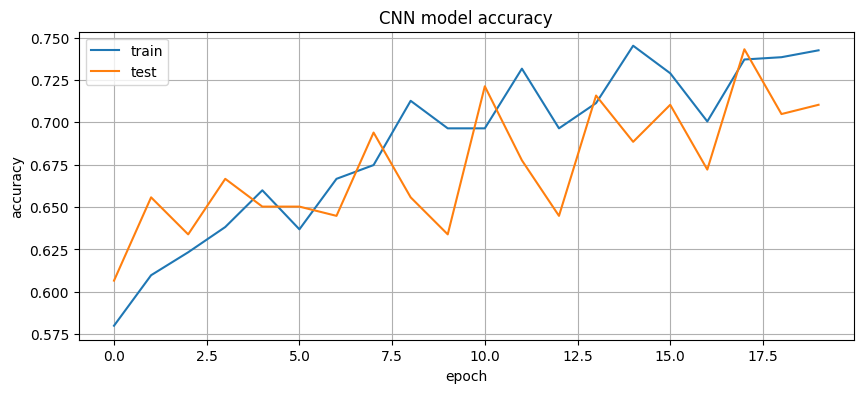

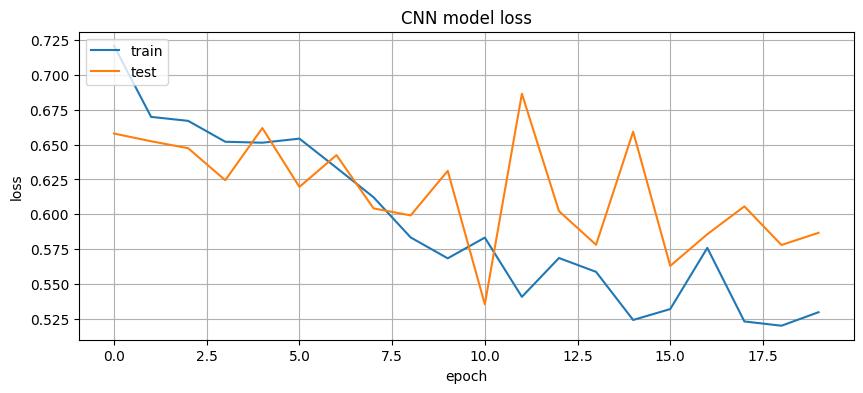

In [ ]:
# Membuat plot akurasi model CNN
plt.figure(figsize=(10,4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()
print()

# Membuat plot loss model Vgg16
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

**Hasil Evaluasi Algoritma CNN-VGG16**

In [ ]:
# Evaluasi model
loss, accuracy = model2.evaluate(test_generator)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

6/6 [==============================] - 140s 23s/step - loss: 0.3408 - accuracy: 0.8525
Test Loss: 0.3408348560333252
Test Accuracy: 0.8524590134620667


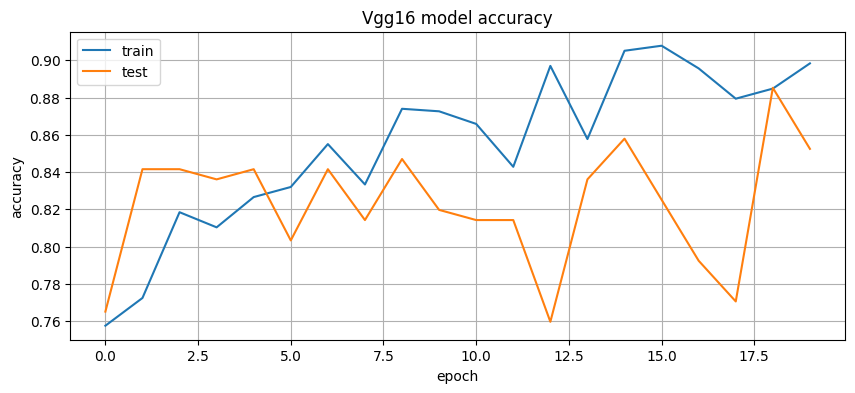

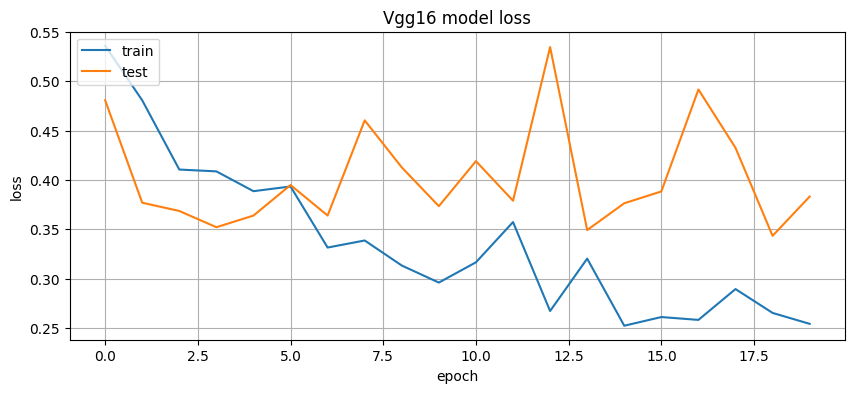

In [ ]:
# Membuat plot akurasi model Vgg16
plt.figure(figsize=(10,4))
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Vgg16 model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()
print()

# Membuat plot loss model Vgg16
plt.figure(figsize=(10,4))
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Vgg16 model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

**Hasil Evaluasi CNN-Alex Net**

In [ ]:
# Evaluasi model
loss, accuracy = model.evaluate(test_generator)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

6/6 [==============================] - 3s 416ms/step - loss: 0.6705 - accuracy: 0.6066
Test Loss: 0.6704657077789307
Test Accuracy: 0.6065573692321777


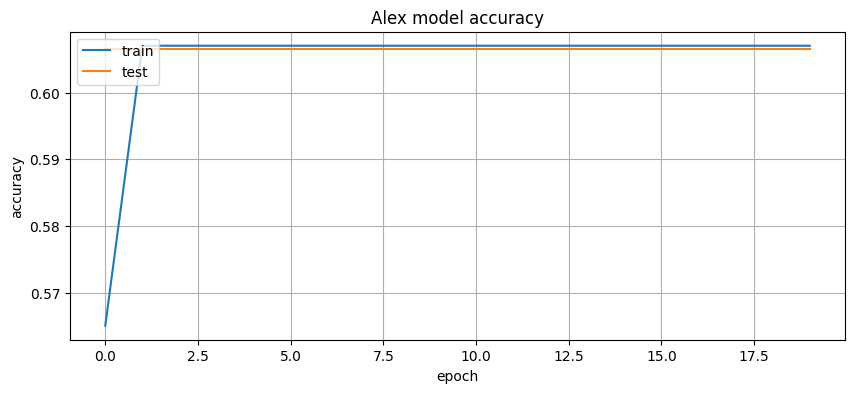

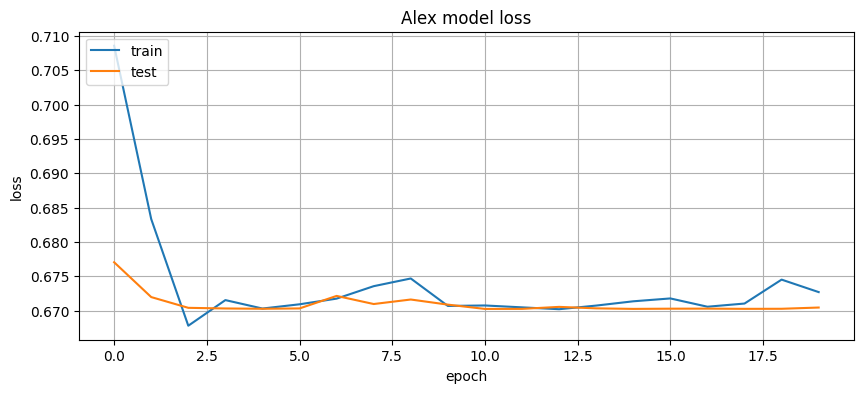

In [ ]:
# Membuat plot akurasi model Alex
plt.figure(figsize=(10,4))
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Alex model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

print()

# Membuat plot loss model Alex
plt.figure(figsize=(10,4))
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Alex model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

**Desenet**

**Hasil Evaluasi 3 Model**

In [ ]:
# Membuat plot akurasi tiga model sebelumnya untuk dibandingkan
plt.figure(figsize=(10,4))
plt.plot(history.history['val_accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['CNN', 'VGG16', 'Alexnet'], loc='lower right')
plt.grid(True)
plt.show()

# Model Selection | Pemilihan Model

Berdasarkan hasil evaluasi model untuk CNN, CNN-vgg16 dan CNN-alexnet diputuskan untuk memilih model CNN-vgg16 . Hal ini dikarenakan pada grafik diatas menunjukan bahwa akurasi untuk vgg16 lebih tinggi dengan akurasi 85.24 % dibandingkan dengan algoritma CNN Murni dan CNN-Alexnet

In [ ]:
# Simpan model ke dalam format Keras
model2.save("model_vgg16.keras")

In [ ]:
# Simpan model ke dalam format SavedModel TensorFlow
tf.saved_model.save(model2, "model_vgg16_saved_model")

In [ ]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np

In [ ]:
# Memuat model yang telah disimpan
model = load_model("model_vgg16.keras")

**IMPLEMENTASI MODEL**

1/1 [==============================] - 2s 2s/step
Gambar tersebut adalah Bukan Manusia


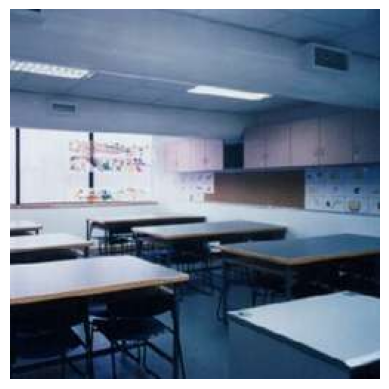

In [ ]:

# Memuat gambar yang akan diprediksi
img_path = "/content/human detection/human detection dataset/0/10.png"  # Ganti dengan path gambar Anda
img = image.load_img(img_path, target_size=(img_width, img_height))
# Praproses gambar
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Menambahkan dimensi batch
img_array /= 255.  # Normalisasi

# Membuat prediksi
prediction = model.predict(img_array)

# Menampilkan hasil prediksi
if prediction[0][0] > 0.5 :
    print("Gambar tersebut adalah Manusia")
else:
    print("Gambar tersebut adalah Bukan Manusia")

# Menampilkan gambar
plt.imshow(img)
plt.axis('off')
plt.show()

1/1 [==============================] - 1s 698ms/step
Gambar tersebut adalah Manusia


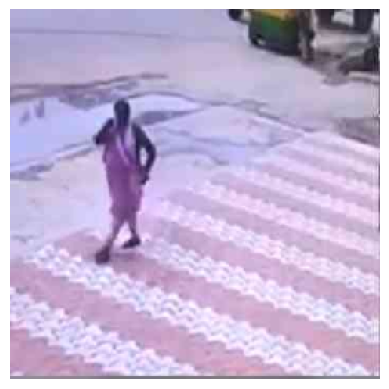

In [ ]:

# Memuat gambar yang akan diprediksi
img_path = "/content/human detection/human detection dataset/1/100.png"  # Ganti dengan path gambar Anda
img = image.load_img(img_path, target_size=(img_width, img_height))
# Praproses gambar
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Menambahkan dimensi batch
img_array /= 255.  # Normalisasi

# Membuat prediksi
prediction = model.predict(img_array)

# Menampilkan hasil prediksi
if prediction[0][0] > 0.5 :
    print("Gambar tersebut adalah Manusia")
else:
    print("Gambar tersebut adalah Bukan Manusia")

# Menampilkan gambar
plt.imshow(img)
plt.axis('off')
plt.show()

# Conclusion | Kesimpulan

**Berdasarkan hasil analisis diatas untuk mendeteksi object manusia atau benda**
1. Pada diagram histogram ditampilkan visualisasi data untuk manusia ada 559 dan benda 362
2. Preprocessing pada human detection ini menggunakan resized images dengan ubah ukuran gambar yang berbeda menjadi seragam dengan ukuran 250x250 sesuai dengan inputan untuk pemodelan, augmentasi dan normalisasi 1/255.
2. Evaluasi kinerja model pada CNN murni, CNN-vGG16 Dan CNN-Alexnet. Pada CNN murni mendapatkan akurasi 72 % dan loss 0,54, pada CNN Vgg16 mendapatkan akurasi 85% dan loss 0.39, dan pada AlexNet mendapatkan akurasi 60 % dan loss 0.67 Dari ketiga evaluasi tersebut ditampilkan dalam bentuk visualisasi sehingga dapat disimpulkan bahwa pemodelan menggunakan Vgg16 memiliki akurasi tertinggi.
3. Pada bagian Implementasi model vgg16 mampu memberikan hasil prediksi untuk deteksi object benda dan manusia dengan baik.
4. Saran untuk ekseperimen selanjutnya gunakan dataset yang lebih besar dan preprocessing yang berbeda.